In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
#EVE Level 2 的取点
wavelength_full=np.load('wavelength_full.npz')['wavelength_full']

In [3]:
df = pd.DataFrame(columns=['Line Name', 'Wavelength Range', 'Initial Guess','Temperature','Accurate Wavelength'])

# Adding the first row
df.loc[0] = ['Fe IX 171', [17,17.21],    [0.0006, 17.11, 0.0424],6.20,171.0730]
df.loc[1] = ['Fe XI 180', [17.95,18.15], [0.0006, 18.05, 0.0424],6.15,180.4010]
df.loc[2] = ['Fe XII 195', [19.43,19.59], [0.0006, 19.51, 0.0424],6.20,195.1190]
df.loc[3] = ['Fe XV 284', [28.31,28.53], [0.0006, 28.42, 0.0424],6.40,284.1630]
df.loc[4] = ['He II 304', [30.25,30.49], [0.006, 30.37, 0.0424],4.90,303.7800] # the one closer to 30.3780

# Skipping 'Fe335' as it is unapplicable
df.loc[5] = ['O V 630', [62.85,63.09], [0.0005, 62.97, 0.0424],5.35,629.7320]
df.loc[6] = ['C III 977', [97.57,97.85], [0.0014, 97.71, 0.0424],4.85,977.0200]
df.loc[7] = ['O VI 1032', [103.05,103.35], [0.0006, 103.19, 0.0424],5.45,1031.9120]

# I use figure to select some prominent lines
df.loc[8]=['Ni XI 148', [14.75, 14.93], [110e-6, 14.84, 0.0424],6.20, 148.3770]
df.loc[9]=['O VI 150', [14.93, 15.09], [44e-6, 15.01, 0.0424],5.50,150.0890]
df.loc[10]=['Ni XII 152', [15.13, 15.35], [65e-6, 15.22, 0.0424],6.30,152.1510]
df.loc[11]=['Fe XXIII 154', [15.35, 15.53], [40e-6, 15.42, 0.0424],7.15,154.3030]
df.loc[12]=['Fe IX 174', [17.37, 17.59], [690e-6, 17.45, 0.0424],6.05,174.5310]
df.loc[13]=['Fe X 177', [17.63, 17.83], [450e-6, 17.72, 0.0424],6.05,177.2400]
df.loc[14]=['Fe XI 182', [18.15, 18.31], [130e-6, 18.22, 0.0424],6.15,182.1670]
df.loc[15]=['Fe X 185', [18.35, 18.59], [200e-6, 18.45, 0.0424],6.05,184.5370]
df.loc[16]=['Fe XII 187', [18.61, 18.75], [180e-6, 18.68, 0.0424],6.20,186.8870]
df.loc[17]=['Fe XI 188', [18.75, 18.93], [550e-6, 18.83, 0.0424],6.15,188.2990]
df.loc[18]=['Unindentified 190', [18.93, 19.07], [110e-6, 19.01, 0.0424],-1,-1]
df.loc[19]=['Fe XIV 211', [21.05, 21.21], [330e-6, 21.13, 0.0424],6.35,211.3170]
df.loc[20]=['Fe IX 217', [21.61, 21.77], [100e-6, 21.70, 0.0424],5.9,217.1010]
df.loc[21]=['Unindentified 242', [24.13, 24.23], [140e-6, 24.18, 0.0424],-1,-1]
df.loc[22]=['Fe XIV 265', [26.37, 26.55], [160e-6, 26.47, 0.0424],6.28,264.7880]  #  SX  and  FeXIV
df.loc[23]=['Unindentified 270', [26.97, 27.13], [90e-6, 27.05, 0.0424],-1,270.5460]   # two lines of Fe XIV and Fe XXI are difference temperature
df.loc[24]=['O IV 272', [27.13, 27.29], [60e-6, 27.2, 0.0424],5.20,272.1270]
df.loc[25]=['Fe XIV 274', [27.33, 27.49], [180e-6, 27.43, 0.0424],6.35,274.2030]
df.loc[26]=['Unindentified 277', [27.63, 27.77], [90e-6, 27.71, 0.0424],-1,-1]
df.loc[27]=['Si IX 296', [29.55, 29.69], [90e-6, 29.61, 0.0424],6.10,296.1170]
df.loc[28]=['Fe XVI 335', [33.47, 33.63], [400e-6, 33.55, 0.0424],6.80,335.4090]
df.loc[29]=['Si X 356', [35.51, 35.69], [100e-6, 35.61, 0.0424],6.20,356.0370]
df.loc[30]=['Mg IX 368', [36.71, 36.89], [500e-6, 36.83, 0.0424],6.00,368.0710]
df.loc[31]=['Ne VII 465', [46.39, 46.69], [130e-6, 46.53, 0.0424],5.70,465.2210]
df.loc[32]=['Si XII 499', [49.85, 50.05], [150e-6, 49.94, 0.0424],6.95,499.4060]
df.loc[33]=['O IV 554', [55.25, 55.61], [150e-6, 55.44, 0.05],5.15,554.5140]
df.loc[34]=['He I 584', [58.31, 58.59], [490e-6, 58.44, 0.0424],4.50,584.3340]
df.loc[35]=['O IV 610', [60.89, 61.09], [240e-6, 60.97, 0.0424],5.15,609.8300]
df.loc[36]=['Mg X 625', [62.39, 62.59], [100e-6, 62.49, 0.0424],6.85,624.9410]
df.loc[37]=['N IV 765', [76.39, 76.63], [90e-6, 76.51, 0.0424],5.10,765.1520]
df.loc[38]=['Ne VIII 770', [76.95, 77.15], [110e-6, 77.04, 0.0424],5.80,770.4280]
df.loc[39]=['Ne VIII 780', [77.93, 78.13], [63e-6, 78.03, 0.0424],5.80,780.3850]
df.loc[40]=['O IV 790', [78.91, 79.13], [148e-6, 79.02, 0.0424],5.15,790.1140]
#有一段continuous spectrum 很强，所以这里不取点
df.loc[41]=['Unindentified 926', [92.55, 92.73], [30e-6, 92.62, 0.0424],-1,-1]
df.loc[42]=['Unindentified 931', [92.97, 93.15], [40e-6, 93.07, 0.0424],-1,-1]
df.loc[43]=['S VI 933', [93.25, 93.43], [40e-6, 93.34, 0.0424],5.30,933.3780]
df.loc[44]=['Unindentified 938', [93.71, 93.89], [57e-6, 93.78, 0.0424],-1,-1]
df.loc[45]=['He I 950', [94.87, 95.09], [100e-6, 94.97, 0.0424],4.50,949.7430]
df.loc[46]=['He I 972', [97.11, 97.39], [180e-6, 97.25, 0.0424],4.50,972.5370]
df.loc[47]=['He I 1026', [102.43, 102.71], [800e-6, 102.57, 0.0424],4.50,1025.7230]


In [4]:
# add a col indicating whether indentified
df['Identified'] = df['Temperature'] > 0

In [5]:
# add another column for the wavelength range
# np.where((wavelength_full<=17.21)*(wavelength_full>17))[0]
def get_index(row):
    return np.where((wavelength_full<=row['Wavelength Range'][1])*(wavelength_full>row['Wavelength Range'][0]))[0]
df['Wavelength Index'] = df.apply(get_index, axis=1)
df

,Line Name,Wavelength Range,Initial Guess,Temperature,Accurate Wavelength,Identified,Wavelength Index
0,Fe IX 171,"[17, 17.21]","[0.0006, 17.11, 0.0424]",6.20,171.073,True,"[700, 701, 702, 703, 704, 705, 706, 707, 708, ..."
1,Fe XI 180,"[17.95, 18.15]","[0.0006, 18.05, 0.0424]",6.15,180.401,True,"[748, 749, 750, 751, 752, 753, 754, 755, 756, ..."
2,Fe XII 195,"[19.43, 19.59]","[0.0006, 19.51, 0.0424]",6.20,195.119,True,"[822, 823, 824, 825, 826, 827, 828, 829]"
3,Fe XV 284,"[28.31, 28.53]","[0.0006, 28.42, 0.0424]",6.40,284.163,True,"[1266, 1267, 1268, 1269, 1270, 1271, 1272, 127..."
4,He II 304,"[30.25, 30.49]","[0.006, 30.37, 0.0424]",4.90,303.780,True,"[1363, 1364, 1365, 1366, 1367, 1368, 1369, 137..."
5,O V 630,"[62.85, 63.09]","[0.0005, 62.97, 0.0424]",5.35,629.732,True,"[2993, 2994, 2995, 2996, 2997, 2998, 2999, 300..."
6,C III 977,"[97.57, 97.85]","[0.0014, 97.71, 0.0424]",4.85,977.020,True,"[4729, 4730, 4731, 4732, 4733, 4734, 4735, 473..."
7,O VI 1032,"[103.05, 103.35]","[0.0006, 103.19, 0.0424]",5.45,1031.912,True,"[5003, 5004, 5005, 5006, 5007, 5008, 5009, 501..."
8,Ni XI 148,"[14.75, 14.93]","[0.00011, 14.84, 0.0424]",6.20,148.377,True,"[588, 589, 590, 591, 592, 593, 594, 595, 596]"
9,O VI 150,"[14.93, 15.09]","[4.4e-05, 15.01, 0.0424]",5.50,150.089,True,"[597, 598, 599, 600, 601, 602, 603, 604]"


In [6]:
# sort the df: according to the value of np.min(df['Wavelength Index'])
df = df.sort_values(by=['Wavelength Range'])
df.reset_index(drop=True, inplace=True)
df

,Line Name,Wavelength Range,Initial Guess,Temperature,Accurate Wavelength,Identified,Wavelength Index
0,Ni XI 148,"[14.75, 14.93]","[0.00011, 14.84, 0.0424]",6.20,148.377,True,"[588, 589, 590, 591, 592, 593, 594, 595, 596]"
1,O VI 150,"[14.93, 15.09]","[4.4e-05, 15.01, 0.0424]",5.50,150.089,True,"[597, 598, 599, 600, 601, 602, 603, 604]"
2,Ni XII 152,"[15.13, 15.35]","[6.5e-05, 15.22, 0.0424]",6.30,152.151,True,"[607, 608, 609, 610, 611, 612, 613, 614, 615, ..."
3,Fe XXIII 154,"[15.35, 15.53]","[4e-05, 15.42, 0.0424]",7.15,154.303,True,"[618, 619, 620, 621, 622, 623, 624, 625, 626]"
4,Fe IX 171,"[17, 17.21]","[0.0006, 17.11, 0.0424]",6.20,171.073,True,"[700, 701, 702, 703, 704, 705, 706, 707, 708, ..."
5,Fe IX 174,"[17.37, 17.59]","[0.00069, 17.45, 0.0424]",6.05,174.531,True,"[719, 720, 721, 722, 723, 724, 725, 726, 727, ..."
6,Fe X 177,"[17.63, 17.83]","[0.00045, 17.72, 0.0424]",6.05,177.240,True,"[732, 733, 734, 735, 736, 737, 738, 739, 740, ..."
7,Fe XI 180,"[17.95, 18.15]","[0.0006, 18.05, 0.0424]",6.15,180.401,True,"[748, 749, 750, 751, 752, 753, 754, 755, 756, ..."
8,Fe XI 182,"[18.15, 18.31]","[0.00013, 18.22, 0.0424]",6.15,182.167,True,"[758, 759, 760, 761, 762, 763, 764, 765]"
9,Fe X 185,"[18.35, 18.59]","[0.0002, 18.45, 0.0424]",6.05,184.537,True,"[768, 769, 770, 771, 772, 773, 774, 775, 776, ..."


In [7]:
df=df[['Line Name', 'Wavelength Range', 'Identified','Temperature','Accurate Wavelength','Initial Guess','Wavelength Index']]

In [8]:
df

,Line Name,Wavelength Range,Identified,Temperature,Accurate Wavelength,Initial Guess,Wavelength Index
0,Ni XI 148,"[14.75, 14.93]",True,6.20,148.377,"[0.00011, 14.84, 0.0424]","[588, 589, 590, 591, 592, 593, 594, 595, 596]"
1,O VI 150,"[14.93, 15.09]",True,5.50,150.089,"[4.4e-05, 15.01, 0.0424]","[597, 598, 599, 600, 601, 602, 603, 604]"
2,Ni XII 152,"[15.13, 15.35]",True,6.30,152.151,"[6.5e-05, 15.22, 0.0424]","[607, 608, 609, 610, 611, 612, 613, 614, 615, ..."
3,Fe XXIII 154,"[15.35, 15.53]",True,7.15,154.303,"[4e-05, 15.42, 0.0424]","[618, 619, 620, 621, 622, 623, 624, 625, 626]"
4,Fe IX 171,"[17, 17.21]",True,6.20,171.073,"[0.0006, 17.11, 0.0424]","[700, 701, 702, 703, 704, 705, 706, 707, 708, ..."
5,Fe IX 174,"[17.37, 17.59]",True,6.05,174.531,"[0.00069, 17.45, 0.0424]","[719, 720, 721, 722, 723, 724, 725, 726, 727, ..."
6,Fe X 177,"[17.63, 17.83]",True,6.05,177.240,"[0.00045, 17.72, 0.0424]","[732, 733, 734, 735, 736, 737, 738, 739, 740, ..."
7,Fe XI 180,"[17.95, 18.15]",True,6.15,180.401,"[0.0006, 18.05, 0.0424]","[748, 749, 750, 751, 752, 753, 754, 755, 756, ..."
8,Fe XI 182,"[18.15, 18.31]",True,6.15,182.167,"[0.00013, 18.22, 0.0424]","[758, 759, 760, 761, 762, 763, 764, 765]"
9,Fe X 185,"[18.35, 18.59]",True,6.05,184.537,"[0.0002, 18.45, 0.0424]","[768, 769, 770, 771, 772, 773, 774, 775, 776, ..."


In [9]:
# set the minus wavelength to nan
df['Accurate Wavelength']=np.where(df['Accurate Wavelength']<0,np.nan,df['Accurate Wavelength'])

# if the Channel according to the largest element whether < 37, if <37 = "MEGS-A", else "MEGS-B"
def get_channel(row):
    return 'MEGS-A' if np.max(row['Wavelength Range']) < 37 else 'MEGS-B'
df['Channel'] = df.apply(get_channel, axis=1)

In [10]:
df

,Line Name,Wavelength Range,Identified,Temperature,Accurate Wavelength,Initial Guess,Wavelength Index,Channel
0,Ni XI 148,"[14.75, 14.93]",True,6.20,148.377,"[0.00011, 14.84, 0.0424]","[588, 589, 590, 591, 592, 593, 594, 595, 596]",MEGS-A
1,O VI 150,"[14.93, 15.09]",True,5.50,150.089,"[4.4e-05, 15.01, 0.0424]","[597, 598, 599, 600, 601, 602, 603, 604]",MEGS-A
2,Ni XII 152,"[15.13, 15.35]",True,6.30,152.151,"[6.5e-05, 15.22, 0.0424]","[607, 608, 609, 610, 611, 612, 613, 614, 615, ...",MEGS-A
3,Fe XXIII 154,"[15.35, 15.53]",True,7.15,154.303,"[4e-05, 15.42, 0.0424]","[618, 619, 620, 621, 622, 623, 624, 625, 626]",MEGS-A
4,Fe IX 171,"[17, 17.21]",True,6.20,171.073,"[0.0006, 17.11, 0.0424]","[700, 701, 702, 703, 704, 705, 706, 707, 708, ...",MEGS-A
5,Fe IX 174,"[17.37, 17.59]",True,6.05,174.531,"[0.00069, 17.45, 0.0424]","[719, 720, 721, 722, 723, 724, 725, 726, 727, ...",MEGS-A
6,Fe X 177,"[17.63, 17.83]",True,6.05,177.240,"[0.00045, 17.72, 0.0424]","[732, 733, 734, 735, 736, 737, 738, 739, 740, ...",MEGS-A
7,Fe XI 180,"[17.95, 18.15]",True,6.15,180.401,"[0.0006, 18.05, 0.0424]","[748, 749, 750, 751, 752, 753, 754, 755, 756, ...",MEGS-A
8,Fe XI 182,"[18.15, 18.31]",True,6.15,182.167,"[0.00013, 18.22, 0.0424]","[758, 759, 760, 761, 762, 763, 764, 765]",MEGS-A
9,Fe X 185,"[18.35, 18.59]",True,6.05,184.537,"[0.0002, 18.45, 0.0424]","[768, 769, 770, 771, 772, 773, 774, 775, 776, ...",MEGS-A


In [11]:
np.where(df['Accurate Wavelength']<370, 'MEGS-A', 'MEGS-B')


array(['MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-A',
       'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-A',
       'MEGS-B', 'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-B', 'MEGS-A',
       'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-B', 'MEGS-A', 'MEGS-A',
       'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-A', 'MEGS-B', 'MEGS-B',
       'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B',
       'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B',
       'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B', 'MEGS-B'],
      dtype='<U6')

In [12]:
with open('selected_band.pkl', 'wb') as f:
    pickle.dump(df, f)

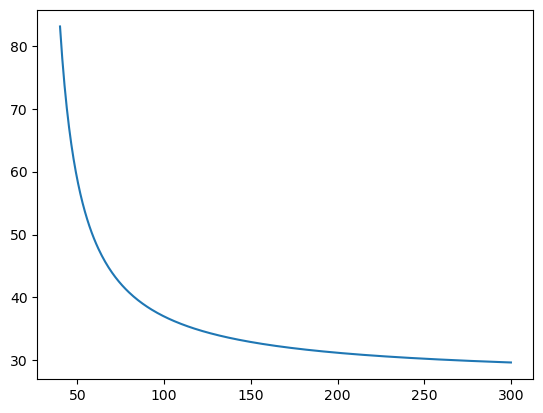

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(40,300,400)
plt.plot(x,  (1/27-1/x)**(-1))

In [8]:
# a function convertin sidereal period to synodic period
def sidereal_to_synodic(sidereal):
    return 1/(1/sidereal-1/365)

def synodic_to_sidereal(synodic):
    return 1/(1/synodic+1/365)

In [7]:
synodic_to_sidereal(27.3)

25.400203925567165

In [11]:
synodic_to_sidereal(240)

144.79338842975207

C:\Users\14902\AppData\Local\Temp\ipykernel_10784\1181188114.py:6: RuntimeWarning: divide by zero encountered in divide
  return 1/(1/synodic+1/365)


Text(0.5, 1.0, 'Synodic Period vs Sidereal Period')

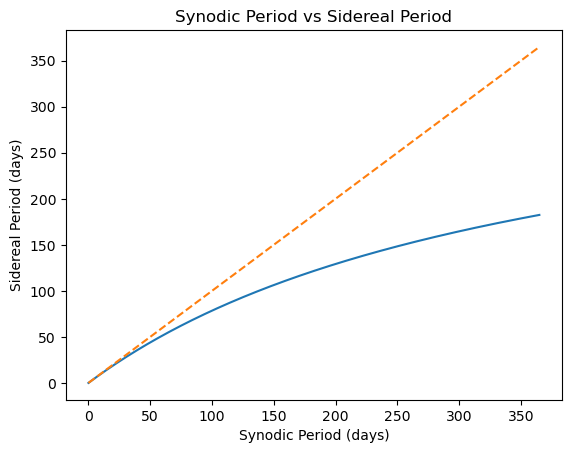

In [20]:
x=np.linspace(0,365,400)
fig,ax=plt.subplots()
ax.plot(x, synodic_to_sidereal(x))

# add a dashed line
ax.plot(x,x, '--')
ax.set_xlabel('Synodic Period (days)')
ax.set_ylabel('Sidereal Period (days)')
ax.set_title('Synodic Period vs Sidereal Period')
